# Supervised learning I

### Warning: Since github doesn't display interactive plots, make sure you are viewing it locally or using nbviewer.


In this session we will dive into the basic scikit-learn API. After briefly introducing scikit-learn's *Estimator* object, we'll cover **supervised learning**, including *classification* and *regression* problems. By the end of the course, you should be able to build a classifier capable of discriminating different classes of faces:

![](https://raw.githubusercontent.com/fabianp/mash_2016_sklearn_intro/master/images/lfw.png)

In [1]:
# some imports
%pylab inline
plt.rcParams['figure.figsize'] = (1 * 10.0, 1 * 9.0)
plt.rcParams['font.size'] = 30

# numpy
import numpy as np

# pandas
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## The Scikit-learn Estimator Object

Every model is exposed in scikit-learn via an ''Estimator'' object. For instance a linear regression is implemented as so:

In [2]:
from sklearn.linear_model import LinearRegression

```LinearRegression``` is implements a linear regression model. That is, we assume that our data is generated as

$$
y_i = x_i^T w + b + \varepsilon_i \text{ for $i=1\ldots n$}
$$

where $y_i, x_i$ are given data, $\varepsilon_i$ is random noise and $w, b$ are the parameters to estimate.

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [3]:
lin_reg = LinearRegression(normalize=True)
print(lin_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. But first, lets create some data

In [4]:
x = np.arange(10)
y = 2 * x + 1 + np.random.randn(x.size)

In [5]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[  0.69826828   2.50177105   5.06193971   8.36080477   9.57888385
  11.06570416  12.69750692  16.25128518  17.84256961  20.20245944]


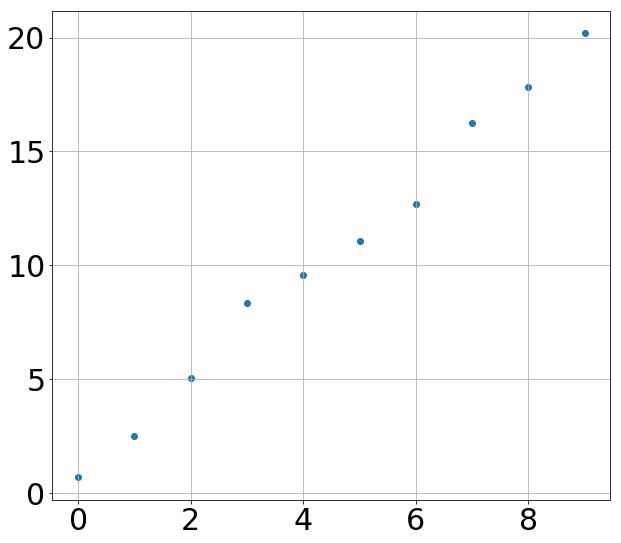

In [6]:
# Plot the data and embed in the notebook!
plt.scatter(x, y)
plt.grid()
plt.show()

In [7]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[  0.69826828   2.50177105   5.06193971   8.36080477   9.57888385
  11.06570416  12.69750692  16.25128518  17.84256961  20.20245944]


In [8]:
# fit the model on our data
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


Now the model is estimated. Hurray!.

All the estimated parameters are attributes of the estimator object ending by an underscore.

In [9]:
# underscore at the end indicates a fit parameter
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 2.14161797]
0.788838447486


Each class can have different estimated parameters and they are named differently.At some point you will probably forget their names: fortunately, ipython has the tab-complete feature that makes introspection easy. Try it out!

Also, scikit-learn comes with excellent documentation: both [reference documentation](http://scikit-learn.org/stable/modules/classes.html) and [examples](http://scikit-learn.org/stable/auto_examples/index.html).

Coming back to our recently trained model, the great thing now is that we can use this model to "predict". We will see why this is great in the next section.

In [10]:
lin_reg.predict(X)

array([  0.78883845,   2.93045641,   5.07207438,   7.21369235,
         9.35531031,  11.49692828,  13.63854625,  15.78016422,
        17.92178218,  20.06340015])

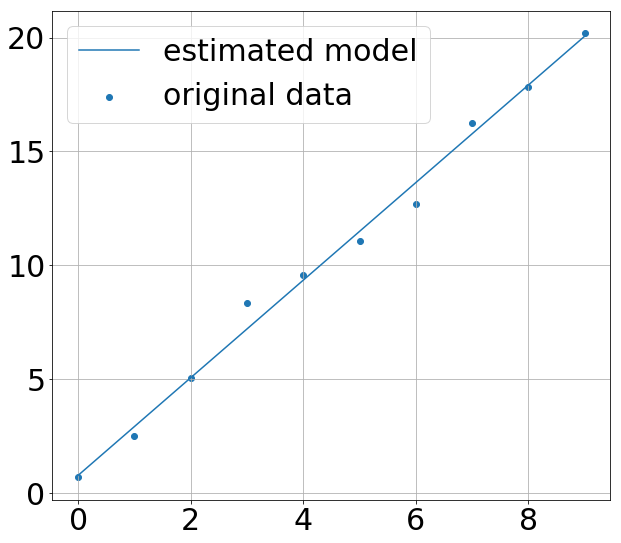

In [11]:
plt.scatter(x, y, label='original data') 
plt.plot(x, lin_reg.predict(X), label='estimated model')
plt.legend()
plt.grid()
plt.show()

## Supervised Learning: Regression and Classification

What we have just seen is a simple instance of supervised learning. We will now see some more challenging scenarios. But first, what is supervised learning anyway?

In **Supervised Learning**, we have a dataset consisting of both features and labels.
The task is to construct an estimator which is able to predict the label of an object
given the set of features. Some examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like
  (So-called *recommender systems*: a famous example is the [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)).
  
This is in oposition to **Upsupervised Learning**, where we are only given features but no labels, and the task is to find some structure in the data, either by grouping observations (clustering) or by finding a low-dimensional representation of the data (dimensionality reduction, manifold learning). Examples of such are:

 - given a collection of images, decide how many people are in the collection.


Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, while in regression, the label is continuous. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

---

### Regression Example

One of the simplest regression problems is fitting a line to data, which we saw above.
Scikit-learn also contains more sophisticated regression algorithms

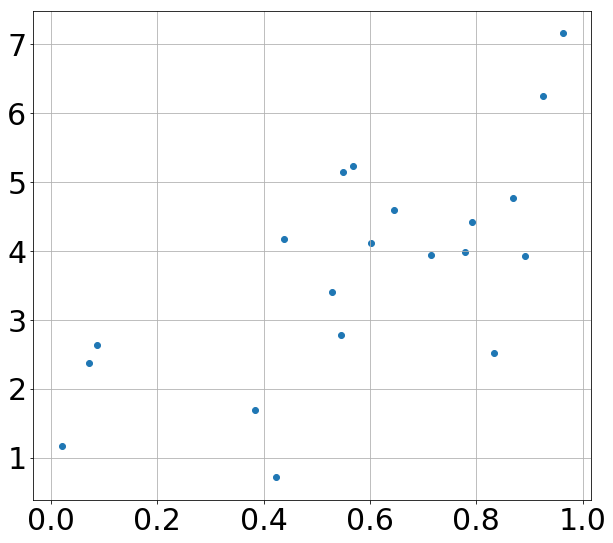

In [12]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))

# y = linear model + noise
y = 3 * X.ravel() + 2 + np.random.randn(20)

plt.scatter(X.ravel(), y)
plt.grid()
plt.show()

As above, we can plot a line of best fit:

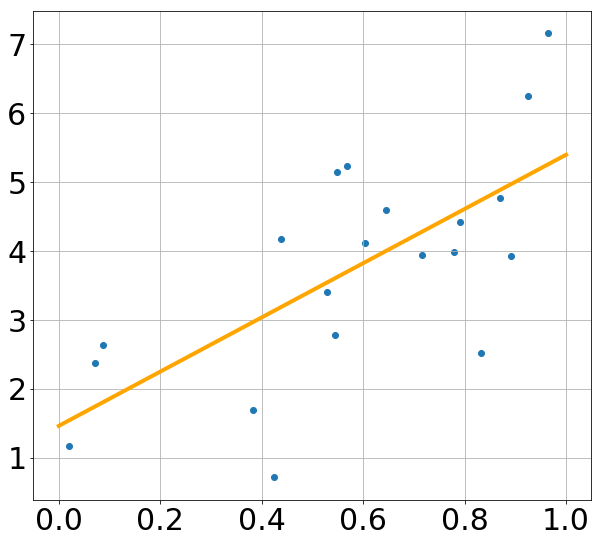

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

X_all = np.linspace(0, 1, 100)[:, np.newaxis]
y_predict = lin_reg.predict(X_all)


plt.scatter(X.ravel(), y, label='original data')
plt.plot(X_all.ravel(), y_predict, label='estimated model', color='orange', lw=4)
plt.grid()
plt.show()


Scikit-learn also has some more sophisticated models, which can respond to finer features in the data:

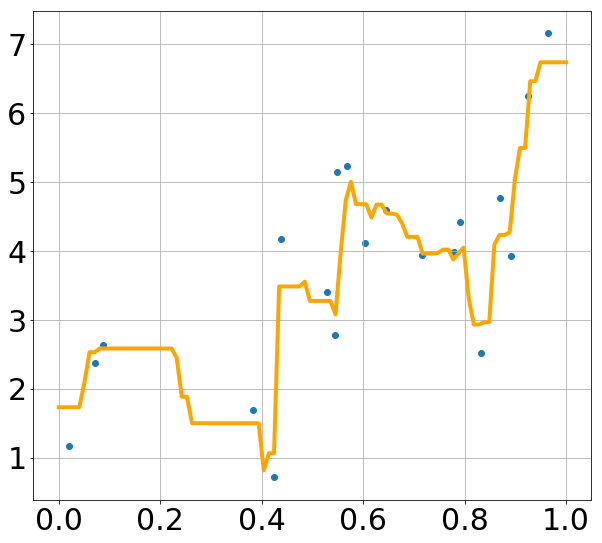

In [14]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor()
ran_for.fit(X, y)

# Plot the data and the model prediction
X_all = np.linspace(0, 1, 100)[:, np.newaxis]
y_predict = ran_for.predict(X_all)
plt.scatter(X.ravel(), y, label='original data')
plt.plot(X_all.ravel(), y_predict, label='estimated model', lw=4, color='orange')
plt.grid()
plt.show()

We can compare the performance of the different classifiers using the method .score(X, y). This returns a number between [-1, 1] representing the accuracy of the model (higher is better).

In [15]:
lin_reg.score(X, y)

0.46752494572004183

In [16]:
ran_for.score(X, y)

0.90916154001749661

In this case, the ```score``` function implements an "R2 score", which is defined as
$$
1 - \frac{\|y - \hat{y}\|^2}{\|y - \bar{y}\|^2}
$$
where $\bar{y}$ is the mean of $y$. The best possible score is $1$.

**Warning**. Different estimators might implement different scoring functions. Make sure you are not comparing apples and oranges.

---

## Classification

Suppose now that instead of predicting a real number you want to predict a categorial variable. For example, yes/no (2 classes), yes/no/maybe (3 classes), etc.

We will consider an example dataset with 3 classes. Its a classical example in which the task is to predict from 3 species of iris (a flower) given a set of measurements of its flower. 

K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.
Let's try it out on our iris classification problem:

In [17]:
# the dataset
from sklearn import datasets, neighbors
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [18]:
# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


Similarly, classification accuracy can be measured with ```.score()```. In this case, the score is just number of correctly classified samples divided by the total number of samples (i.e., the average number of correctly classified samples).

In [19]:
knn.score(X, y)

0.96666666666666667

**Quiz**: 

* Predicting the height of a person, it is a classification or a regression problem?

* Predicting the grade of a student, is it a classification or a regression problem?

* [Ridge()](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) and a [RidgeClassifier()](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html) implement the same underlying model. Why do we have two different classes?

### Recap: Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we'll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- For all **supervised estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.score()` : for classification or regression problems, all estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.

- Some also implement:
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.


## Model Validation

An important piece of machine learning is **model validation**: that is, determining how well your model will generalize from the training data to future unlabeled data. Let's look at an example using the *nearest neighbor classifier*. This is a very simple classifier: it simply stores all training data, and for any unknown quantity, simply returns the label of the closest training point.

With the iris data, it very easily returns the correct prediction for each of the input points:

In [20]:
from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
print(clf.score(X, y))


1.0


For each class, all 50 training samples are correctly identified. But this **does not mean that our model is perfect!** In particular, such a model generalizes extremely poorly to new data. We can simulate this by splitting our data into a *training set* and a *testing set*. Scikit-learn contains some convenient routines to do this:

In [21]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
clf.fit(Xtrain, ytrain)
print(clf.score(Xtest, ytest))

0.947368421053


/home/fabian/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


This paints a better picture of the true performance of our classifier: apparently there the classification is not perfect.

This is why it's **extremely important** to use a train/test split when evaluating your models.  We'll go into more depth on model evaluation later in this tutorial.

## Quick Application: Optical Character Recognition

To demonstrate the above principles on a more interesting problem, let's consider OCR (Optical Character Recognition) – that is, recognizing hand-written digits.
In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use scikit-learn's set of pre-formatted digits, which is built-in to the library.

### Loading and visualizing the digits data

We'll use scikit-learn's data access interface and take a look at this data:

In [22]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

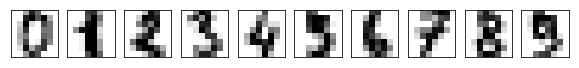

In [23]:
from plotly import tools

fig, ax = plt.subplots(1, 10)

for j in range(10):
    ax[j].imshow(digits.images[j], cmap=plt.cm.gray_r)
    ax[j].set_xticks(())
    ax[j].set_yticks(())
# fig['layout'].update(height=250, width=1000, title='digits examples')
# iplot(fig, image_height=200, image_width=200)

Let's plot a few of these:

Here the data is simply each pixel value within an 8x8 grid:

In [24]:
# The images themselves
print(digits.images.shape)
print(digits.images[0])

(1797, 8, 8)
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [25]:
# The data for use in our algorithms
print(digits.data.shape)
print(digits.data[0])

(1797, 64)
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


In [26]:
# The target label
print(digits.target)

[0 1 2 ..., 8 9 8]


So our data have 1797 samples in 64 dimensions.

### Classification on Digits

Let's try a classification task on the digits. The first thing we'll want to do is split the digits into a training and testing sample:

In [27]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    digits.data, digits.target, random_state=2)
print(Xtrain.shape, Xtest.shape)

(1347, 64) (450, 64)


Let's use a simple logistic regression which (despite its confusing name) is a classification algorithm:

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We can check our classification accuracy by comparing the true values of the test set to the predictions:

In [29]:
clf.score(Xtest, ytest)

0.94666666666666666

This single number doesn't tell us **where** we've gone wrong: one nice way to do this is to use the *confusion matrix*

In [30]:
from sklearn.metrics import confusion_matrix
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  3  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  2  0  3  1  0]
 [ 0  2  0  0 36  0  0  0  1  1]
 [ 0  0  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  2  0  0  0  0  0  0 38  0]
 [ 0  0  0  1  0  1  0  1  2 34]]


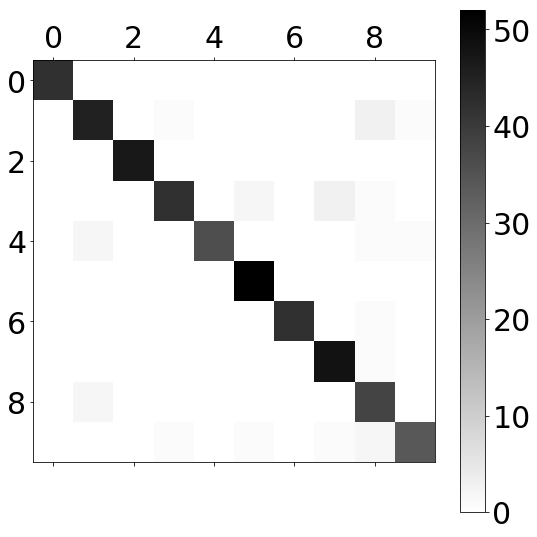

In [31]:
plt.matshow(confusion_matrix(ytest, ypred), cmap=plt.cm.gray_r)
plt.colorbar()
plt.show()

The interesting thing is that even with this simple logistic regression algorithm, many of the mislabeled cases are ones that we ourselves might get wrong!

There are many ways to improve this classifier. To go further, we could use a more sophisticated model, use cross validation, or apply other techniques.
We'll cover some of these topics later in the tutorial.

# Cross-Validation
One problem with validation sets is that you "loose" some of the data. Above, we've only used 3/4 of the data for the training, and used 1/4 for the validation. 

Another option is to use 2-fold cross-validation, where we split the sample in half and perform the validation twice. Thus a two-fold cross-validation gives us two estimates of the score for that parameter. Because this is a bit of a pain to do by hand, scikit-learn has a utility routine to help:



In [32]:
from sklearn.cross_validation import cross_val_score
cv = cross_val_score(KNeighborsClassifier(1), X, y, cv=10)
print(cv)


[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]


---

## Exercise

Face recognition engine using the dataset [Labeled Faces in the Wild (LFW)](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html#sklearn.datasets.fetch_lfw_people).
   * plot some of the images
   * build a machine learning system that predicts the **name** of the person in the images.
   * plot a confusion matrix to see which are the persons that are most often mistaken.

In [33]:
# get the data
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# print the names
for name in lfw_people.target_names:
    print(name)



Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair
